In [20]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from keras.utils import np_utils
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
wine_df = pd.read_csv("preprocessed_wine_data.csv", sep=",")
wine_df.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.10,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6
1,6.3,0.27,0.29,12.20,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6
2,7.0,0.30,0.51,13.60,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7
3,7.4,0.38,0.27,7.50,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,5
4,8.1,0.12,0.38,0.90,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6
5,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,7
6,7.3,0.26,0.36,5.20,0.040,31.0,141.0,0.99310,3.16,0.59,11.0,6
7,6.9,0.32,0.17,7.60,0.042,69.0,219.0,0.99590,3.13,0.40,8.9,5
8,8.5,0.18,0.30,1.10,0.028,34.0,95.0,0.99272,2.83,0.36,10.0,4
9,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6


In [3]:
X = wine_df.copy()
X = X.drop("quality", axis=1)
y = wine_df["quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1497, 11)
(499, 11)
(1497,)
(499,)


In [ ]:
# X = wine_df.copy()
# X = X.drop("quality", axis=1)
# y = wine_df["quality"].values
# dummy_y = np_utils.to_categorical(y)
# X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, random_state=78)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [4]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6012024048096193


In [6]:
# from sklearn.feature_selection import SelectFromModel
# sel = SelectFromModel(clf)
# sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=50, random_state=1))

In [7]:
# X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
# scaler = StandardScaler().fit(X_selected_train)
# X_selected_train_scaled = scaler.transform(X_selected_train)
# X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/rjarvis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [8]:
clf_selected = ExtraTreesClassifier(random_state=1, n_estimators=500).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf_selected.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf_selected.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9979959919839679
Testing Score: 0.5771543086172345


In [6]:
clf2 = ExtraTreesClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf2.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf2.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6112224448897795


In [7]:
clf3 = ExtraTreesClassifier(random_state=1, n_estimators=25).fit(X_train_scaled, y_train)
print(f'Training Score: {clf3.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf3.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6132264529058116


In [8]:
clf4 = ExtraTreesClassifier(random_state=1, n_estimators=15).fit(X_train_scaled, y_train)
print(f'Training Score: {clf4.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf4.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.5951903807615231


In [9]:
clf5 = ExtraTreesClassifier(random_state=1, n_estimators=5).fit(X_train_scaled, y_train)
print(f'Training Score: {clf5.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf5.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.5791583166332666


In [10]:
predictions = clf3.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
display(cm)

array([[  0,   4,   4,   0,   0,   0],
       [  0,  96,  37,   1,   0,   0],
       [  1,  48, 166,  18,   1,   0],
       [  0,   5,  54,  39,   1,   0],
       [  0,   1,   9,   8,   5,   0],
       [  0,   0,   1,   0,   0,   0]])

/var/folders/rq/1_5hwcpj4mlb2h2j3lqyjwsh0000gp/T/ipykernel_65050/1482230690.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
/var/folders/rq/1_5hwcpj4mlb2h2j3lqyjwsh0000gp/T/ipykernel_65050/1482230690.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


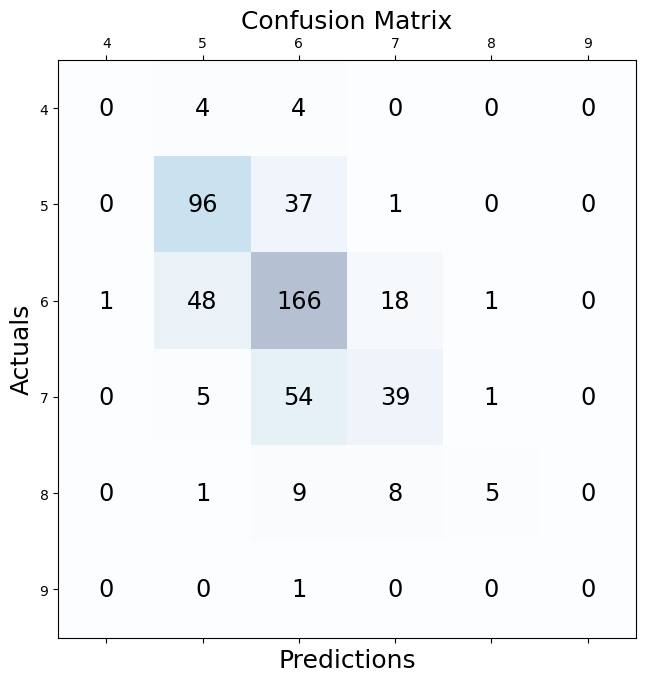

In [27]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
labels = [3,4,5,6,7,8, 9]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.62      0.72      0.67       134
           6       0.61      0.71      0.66       234
           7       0.59      0.39      0.47        99
           8       0.71      0.22      0.33        23
           9       0.00      0.00      0.00         1

    accuracy                           0.61       499
   macro avg       0.42      0.34      0.36       499
weighted avg       0.60      0.61      0.60       499



/Users/rjarvis/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rjarvis/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rjarvis/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
report = classification_report(y_test, predictions, output_dict = True)
report_df = pd.DataFrame(report).transpose()
report_df

/Users/rjarvis/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rjarvis/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rjarvis/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
4,0.000000,0.000000,0.000000,8.000000
5,0.623377,0.716418,0.666667,134.000000
6,0.612546,0.709402,0.657426,234.000000
7,0.590909,0.393939,0.472727,99.000000
8,0.714286,0.217391,0.333333,23.000000
9,0.000000,0.000000,0.000000,1.000000
accuracy,0.613226,0.613226,0.613226,0.613226
macro avg,0.423520,0.339525,0.355026,499.000000
weighted avg,0.604803,0.613226,0.596468,499.000000


In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (2).

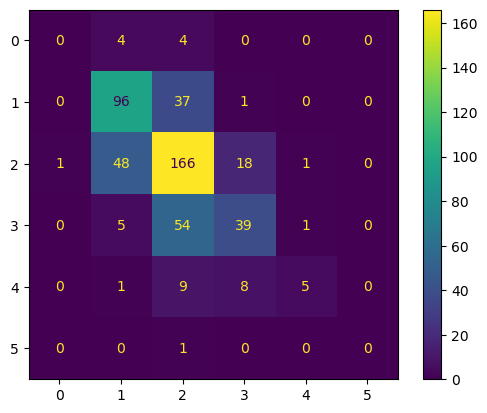

In [24]:
cm_display.plot()
plt.show()

